### Fake News Classifier
**Objective**
- The objective of the notebook is to be able to build a ML classifier for fake news

Author Rod Morrison

**Import & Combine the data from the data files**

In [39]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [40]:
fake = pd.read_csv("data/Fake.csv")
true = pd.read_csv("data/True.csv")


In [41]:
# Add labels: 0 for true, 1 for fake
fake['label'] = 1
true['label'] = 0

In [42]:
# Display information about the datasets
fake.info()
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   label    23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   label    21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB


In [43]:
# Combine the datasets
data = pd.concat([fake, true], ignore_index=True)

In [44]:
# Shuffle the data for randomness
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the structure
print(data.head())

                                               title  \
0  Ben Stein Calls Out 9th Circuit Court: Committ...   
1  Trump drops Steve Bannon from National Securit...   
2  Puerto Rico expects U.S. to lift Jones Act shi...   
3   OOPS: Trump Just Accidentally Confirmed He Le...   
4  Donald Trump heads for Scotland to reopen a go...   

                                                text       subject  \
0  21st Century Wire says Ben Stein, reputable pr...       US_News   
1  WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews   
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...  politicsNews   
3  On Monday, Donald Trump once again embarrassed...          News   
4  GLASGOW, Scotland (Reuters) - Most U.S. presid...  politicsNews   

                  date  label  
0    February 13, 2017      1  
1       April 5, 2017       0  
2  September 27, 2017       0  
3         May 22, 2017      1  
4       June 24, 2016       0  


**Preprocess and Clean the data**

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import re

# Basic text cleaning function
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text


In [46]:
# Split features and labels
X = data['text']
y = data['label']

In [47]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

**Train the Machine Learning Models**

In [48]:
# Models to evaluate
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# Evaluate each sklearn model
results = []
for name, model in models.items():
    # Train the model
    model.fit(X_train_tfidf, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_tfidf)
    
    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    results.append({"Model": name, "Accuracy": accuracy})

# Print results summary
print("\nSummary of Results:")
for result in results:
    print(f"{result['Model']}: {result['Accuracy']:.2f}")


Model: Naive Bayes
Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      4270
           1       0.93      0.93      0.93      4710

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980

Model: Logistic Regression
Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4270
           1       0.99      0.98      0.98      4710

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980

Model: Random Forest
Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4270
           1       1.00      1.00      1.00      4710

    accuracy                           1.00      8980
   macro avg    

**Experiment with Other Model - LTSMl**

In [ ]:
# Prepare padded sequences for LSTM
X_train_pad = pad_sequences(X_train_seq, maxlen=200)
X_test_pad = pad_sequences(X_test_seq, maxlen=200)

# Define and train an LSTM model
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=200),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = lstm_model.fit(X_train_pad, y_train, validation_data=(X_test_pad, y_test), epochs=3, batch_size=64)

# Evaluate the LSTM model
loss, accuracy = lstm_model.evaluate(X_test_pad, y_test)
print(f"\nModel: LSTM")
print(f"Accuracy: {accuracy:.2f}")

# Add to results
results.append({"Model": "LSTM", "Accuracy": accuracy})

Epoch 1/3
562/562 [==============================] - 314s 551ms/step - loss: 0.1138 - accuracy: 0.9576 - val_loss: 0.0396 - val_accuracy: 0.9885
Epoch 2/3
562/562 [==============================] - 319s 567ms/step - loss: 0.0324 - accuracy: 0.9908 - val_loss: 0.0443 - val_accuracy: 0.9885
Epoch 3/3
281/281 [==============================] - 41s 146ms/step - loss: 0.0535 - accuracy: 0.9869

Model: LSTM
Accuracy: 0.99


**Compare the results**


Comparison of All Models:
                 Model  Accuracy
0          Naive Bayes  0.929176
1  Logistic Regression  0.983964
2        Random Forest  0.996993
3                 LSTM  0.986860


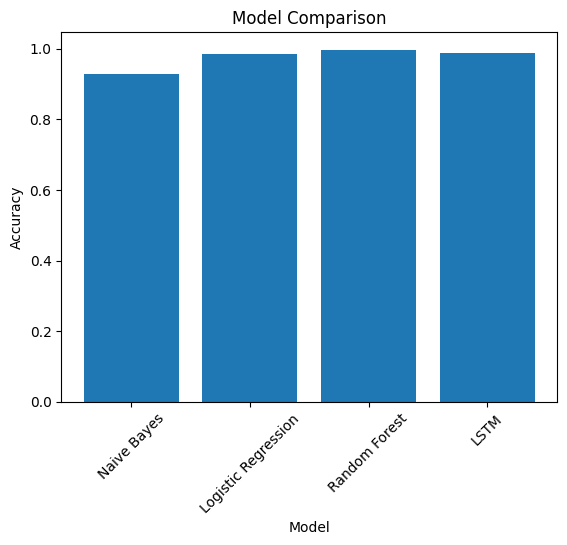

In [50]:
# Create a summary DataFrame
results_df = pd.DataFrame(results)
print("\nComparison of All Models:")
print(results_df)

# Visualize results
import matplotlib.pyplot as plt

plt.bar(results_df["Model"], results_df["Accuracy"])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.xticks(rotation=45)
plt.show()
